Problem 1A

In [31]:
import numpy as np
import pandas as pd

from google.colab import files
uploaded = files.upload()

df = pd.read_csv("Human_Development_Index_Dataset.csv", encoding ='latin1')

#Task1 => Extract Latest Year
#unique years in dataset
print("Unique years in the dataset: ", df['year'].unique())

#Filtering dataset for the year 2022
hdi_2022_df = df[df['year']== 2022].copy()

#Saving the fitered dataframe for later tasks
hdi_2022_df.to_csv("hdi_2022_df.csv", index = False)
print("hdi_2022_df is saved successfully!\n")

#Task 2 => Data Exploration
#Displaying first 10 rows of 2022 dataset
print(hdi_2022_df.head(10))

#Counting number of rows and column
print("\nThe number of rows and column: ",hdi_2022_df.shape)

#Listing column names and their datatypes
print("\nColumn names and datatype\n", hdi_2022_df.dtypes)

#Task3 => Missing values and Data cleaning
#Checking missing values, total counts
print(hdi_2022_df.isna().sum())

#inspecting dataset
#replacing special character with NaN
hdi_2022_df.replace(["–","-"," "], np.nan, inplace = True)

#Convert numeric columns stored as text
# Columns that should be numeric
numeric_cols = hdi_2022_df.columns.difference(["iso3", "country"])
hdi_2022_df[numeric_cols] = hdi_2022_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

#inspecting for misspelled country name
print("\nAll unique country names:")
all_countries = sorted(hdi_2022_df['country'].unique())
for country in all_countries:
    print(country)

#removing duplicate
hdi_2022_df.drop_duplicates(inplace = True)

#Handling missing values
hdi_2022_df.dropna(subset=["hdi"], inplace = True)

#Task 4 => Basic Statics
#computing mean , median and std
mean_hdi = hdi_2022_df["hdi"].mean()
median_hdi = hdi_2022_df["hdi"].median()
std_hdi = hdi_2022_df["hdi"].std()

print("\nThe mean, median and standard deviation are:\n")
print("Mean HDI: ", mean_hdi)
print("Median HDI: ", median_hdi)
print("Standard Deviation: ", std_hdi)

#country with highest hdi
highest = hdi_2022_df.loc[hdi_2022_df["hdi"].idxmax(), ["country", "hdi"]]
print("\nThe highest HDI country in 2022: ", highest)

#country with lowest hdi
lowest = hdi_2022_df.loc[hdi_2022_df["hdi"].idxmin(), ["country", "hdi"]]
print("\nThe lowest HDI country in 2022: ", lowest)

#Task 5 => Filtering and Sorting
#filtering country with hdi greater than 0.800
high_hdi = hdi_2022_df[hdi_2022_df["hdi"]>0.800]

#sorting the dataset by gni per capita in decending order
top10_gni = high_hdi.sort_values(
    by = "gross_inc_percap",
    ascending = False
).head(10)

#displaying top 10 countries
print(top10_gni)

#Task 6 => Adding HDI category column
#creating the column
def classify_hdi(value):
  if value < 0.550:
    return "Low"
  elif 0.550 <= value <= 0.699:
    return "Medium"
  elif 0.700 <= value <= 0.799:
    return "High"
  else:
    return "Very"
hdi_2022_df["HDI Category"] = hdi_2022_df["hdi"].apply(classify_hdi)
hdi_2022_df["HDI Category"].value_counts()

#saving the df
hdi_2022_df.to_csv("HDI_category_added.csv", index = False)
#files.download("HDI_category_added.csv")
print("hdi_category_added.csv is saved successfully!\n")


Saving Human_Development_Index_Dataset.csv to Human_Development_Index_Dataset (2).csv
Unique years in the dataset:  [1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022]
hdi_2022_df is saved successfully!

     Unnamed: 0 iso3              country  year    hdi  life_expectancy  \
32           33  AFG          Afghanistan  2022  0.462           62.879   
65           66  ALB              Albania  2022  0.789           76.833   
98           99  DZA              Algeria  2022  0.745           77.129   
131         132  AND              Andorra  2022  0.884           83.552   
164         165  AGO               Angola  2022  0.591           61.929   
197         198  ATG  Antigua and Barbuda  2022  0.826           79.236   
230         231  ARG            Argentina  2022  0.849           76.064   
263         264  ARM              Armenia  2022  0.786           73.372   
296 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hdi_category_added.csv is saved successfully!



Problem 1B

hdi_problem1B.csv is saved successfully!

Missing values in essential columns (hdi, country, year):
hdi        8
country    0
year       0
dtype: int64

Missing or null values in each column:
Unnamed: 0                     0
iso3                           0
country                        0
year                           0
hdi                            8
life_expectancy                0
pop_millions                   0
hdi_f                         41
hdi_m                         41
life_expec_f                   0
life_expec_m                   0
expec_yr_school                5
expec_yr_school_f              5
expec_yr_school_m              5
mean_yr_school                 8
mean_yr_school_f               8
mean_yr_school_m               8
gross_inc_percap               6
gross_inc_percap_f            39
gross_inc_percap_m            39
gender_development            41
gender_inequality             89
secondary_education_f_%       53
secondary_education_m_%       53
seats_in_parliam

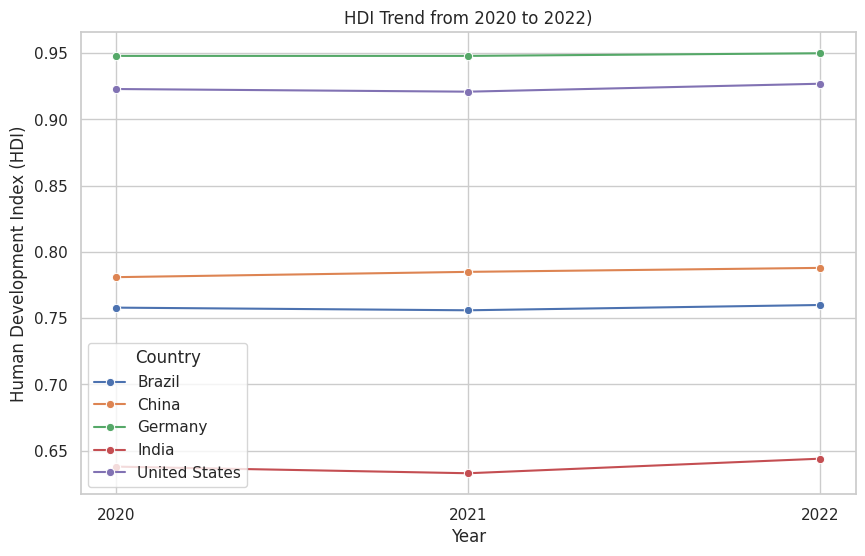

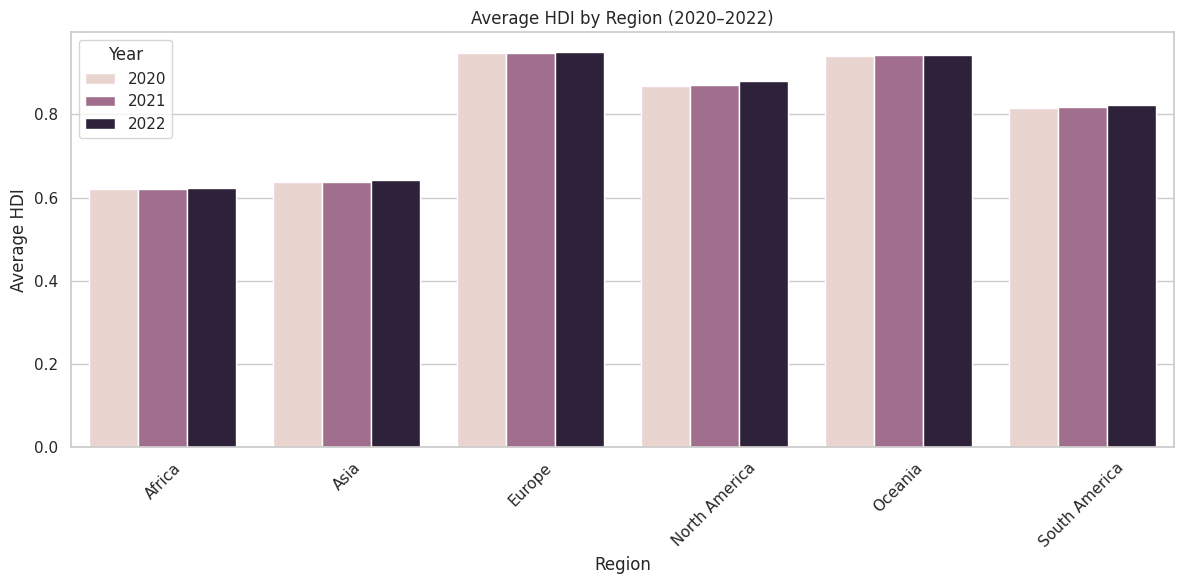

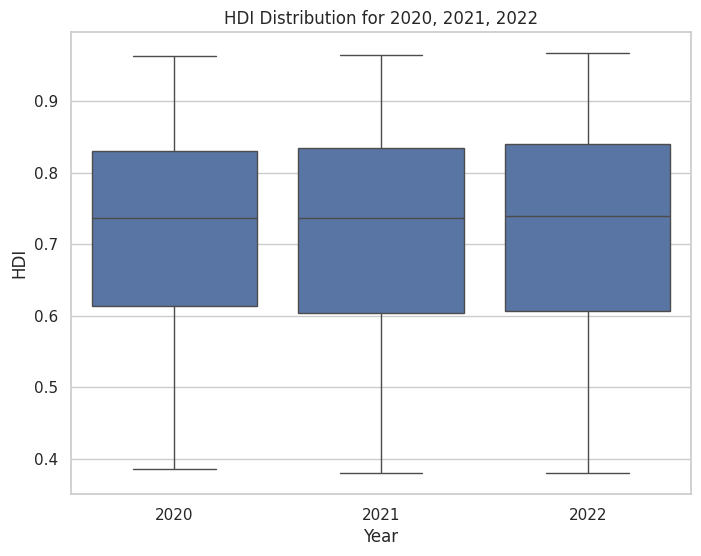

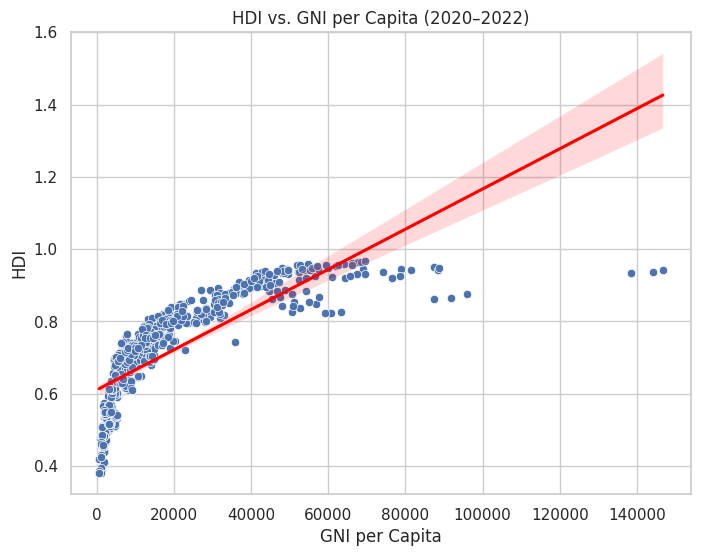

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Human_Development_Index_Dataset.csv", encoding ='latin1')

#Task 1 => Data Extraction and Saving
#Filtering the dataset for years 2020, 2021 and 2022
HDI_problem1B = df[df['year'].isin([2020, 2021, 2022])].copy()

# Saving the filtered dataset as hdi_problem1B.csv
HDI_problem1B.to_csv("HDI_problem1B.csv", index=False)
print("hdi_problem1B.csv is saved successfully!\n")

#Task 2 => Data cleaning
#Checking for missing values for hdi, country and year
print("Missing values in essential columns (hdi, country, year):")
print(HDI_problem1B[['hdi', 'country', 'year']].isna().sum())

#Identifying missing or null values
print("\nMissing or null values in each column:")
print(HDI_problem1B.isna().sum())

#identifying inconsistent or misspelled country names
print("\nAll unique country names:")
print(sorted(HDI_problem1B['country'].unique()))

#Inspecting for duplicate rows
duplicate_count = HDI_problem1B.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_count)

#Checking for numeric columns stored as text
numeric_cols = HDI_problem1B.columns.difference(['iso3','country'])
print("\nData types of numeric columns before conversion:")
print(HDI_problem1B[numeric_cols].dtypes)

#Checking for non-numeric symbols
special_chars = HDI_problem1B.apply(lambda col: col.isin(["–","-"," "]).sum())
print("\nCount of special characters that may represent missing data per column:")
print(special_chars[special_chars > 0])

#Replacing special characters with NaN
HDI_problem1B.replace(["–","-"," "], np.nan, inplace=True)

#Converting numeric columns stored as text
HDI_problem1B[numeric_cols] = HDI_problem1B[numeric_cols].apply(pd.to_numeric, errors='coerce')

#Removing duplicate rows
HDI_problem1B.drop_duplicates(inplace=True)

#Handling missing values
HDI_problem1B.dropna(subset=['hdi','country','year'], inplace=True)

#Saving cleaned dataset for further tasks
HDI_problem1B.to_csv("HDI_problem1B_cleaned.csv", index=False)
print("\nData cleaning completed. Dataset shape after cleaning:", HDI_problem1B.shape)

#Task 3 => Visualization Tasks
sns.set(style = "whitegrid")

#Line chart : HDI trend
countries = ["United States","China","India","Germany","Brazil"]
line_df = HDI_problem1B[HDI_problem1B['country'].isin(countries)]
plt.figure(figsize=(10,6))
sns.lineplot(data=line_df, x="year", y="hdi", hue="country", marker="o")
plt.title("HDI Trend from 2020 to 2022)")
plt.xlabel("Year")
plt.ylabel("Human Development Index (HDI)")
plt.xticks([2020,2021,2022])
plt.legend(title="Country")
plt.grid(True)
plt.show()

#Bar chart : Average HDI by Region(2020-2022)
hdi_2020_2022 = df.loc[df['year'].isin([2020, 2021, 2022])].copy()
region_map = {
    'Afghanistan': 'Asia',
    'Bangladesh': 'Asia',
    'Bhutan': 'Asia',
    'India': 'Asia',
    'Maldives': 'Asia',
    'Nepal': 'Asia',
    'Pakistan': 'Asia',
    'Sri Lanka': 'Asia',
    'Germany': 'Europe',
    'Nigeria': 'Africa',
    'Kenya': 'Africa',
    'South Africa': 'Africa',
    'United States': 'North America',
    'Canada': 'North America',
    'Mexico': 'North America',
    'Brazil': 'South America',
    'Argentina': 'South America',
    'Chile': 'South America',
    'Australia': 'Oceania',
    'New Zealand': 'Oceania'
}
hdi_2020_2022.loc[:, 'region'] = hdi_2020_2022['country'].map(region_map)
hdi_2020_2022 = hdi_2020_2022.dropna(subset=['region'])
region_avg = (hdi_2020_2022.groupby(['region', 'year'])['hdi'].mean().reset_index())

plt.figure(figsize=(12, 6))
sns.barplot(data=region_avg, x='region', y='hdi', hue='year')
plt.xlabel("Region")
plt.ylabel("Average HDI")
plt.title("Average HDI by Region (2020–2022)")
plt.xticks(rotation=45)
plt.legend(title="Year")
plt.tight_layout()
plt.show()

#Box plot : HDI Distribution for 2020, 2021, 2022
plt.figure(figsize=(8,6))
sns.boxplot(data=HDI_problem1B, x='year', y='hdi')
plt.title("HDI Distribution for 2020, 2021, 2022")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.show()

#scatter plot : HDI vs GNI per capita
if 'gross_inc_percap' in HDI_problem1B.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=HDI_problem1B, x='gross_inc_percap', y='hdi')
    sns.regplot(data=HDI_problem1B, x='gross_inc_percap', y='hdi', scatter=False, color='red')
    plt.title("HDI vs. GNI per Capita (2020–2022)")
    plt.xlabel("GNI per Capita")
    plt.ylabel("HDI")
    plt.show()
else:
    print("GNI per Capita variable not available in the dataset.")



Problem 2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

HDI_SouthAsia.csv is saved successfully!


Composite score ranking from highest to lowest (2022):
 country
Maldives       5678.289357
Sri Lanka      3592.832541
Bhutan         3209.130864
India          2105.481239
Bangladesh     1975.446053
Pakistan       1632.210427
Nepal          1228.811605
Afghanistan     419.425420
Name: Composite_Score, dtype: float64


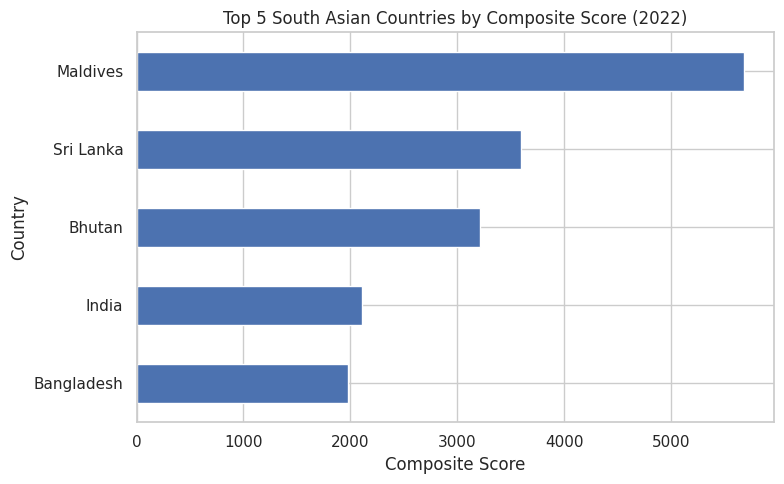


Composite Score V/S HDI ranking comparision (2022):
   HDI Rank Order Composite Rank Order
0      Sri Lanka             Maldives
1       Maldives            Sri Lanka
2         Bhutan               Bhutan
3     Bangladesh                India
4          India           Bangladesh
5          Nepal             Pakistan
6       Pakistan                Nepal
7    Afghanistan          Afghanistan


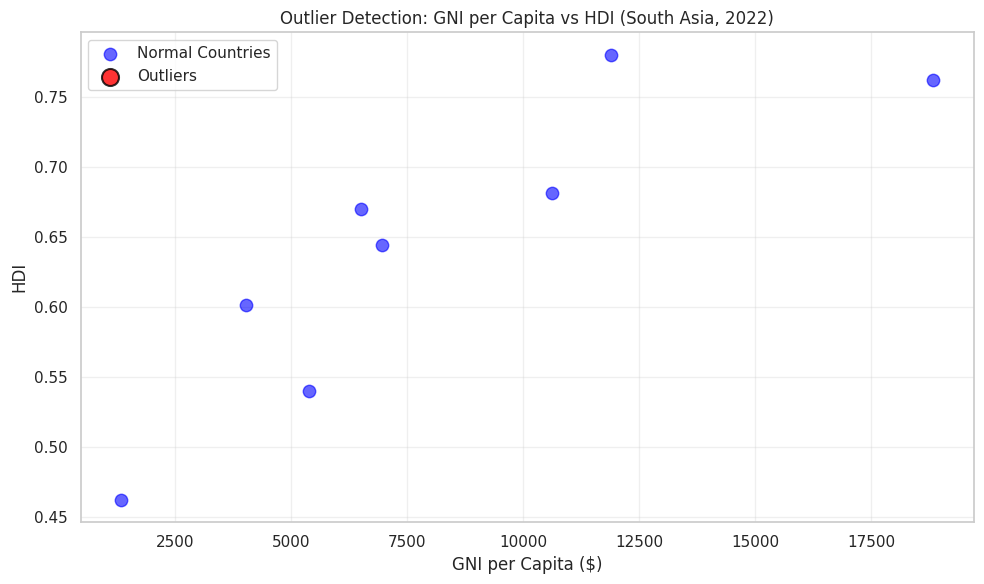


Correlation (HDI vs gender_development): 0.874
Correlation (HDI vs life_expectancy): 0.939


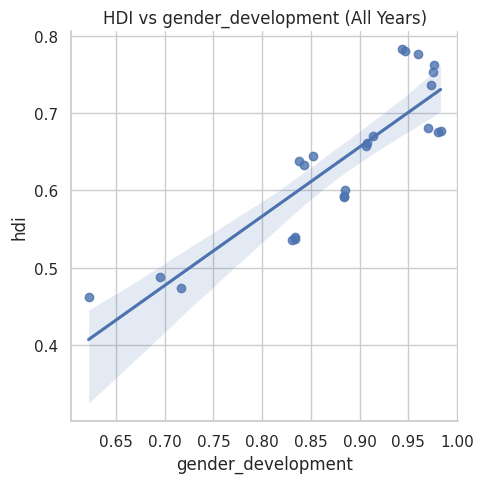

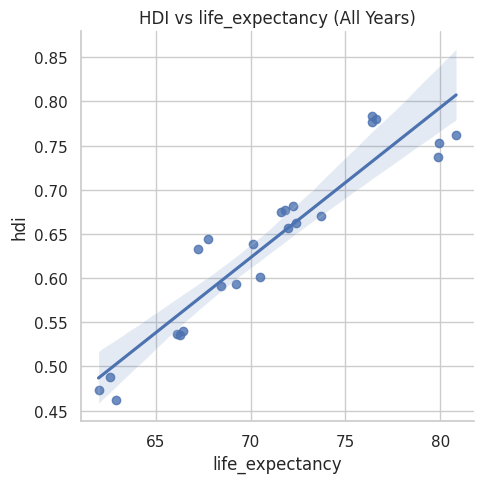


Countries with Largest Positive Gap (2022): country
Maldives     18846.03019
Sri Lanka    11898.71847
Bhutan       10624.19288
Name: GNI_HDI_Gap, dtype: float64

Countries with Largest Negative Gap (2022): country
Pakistan       5373.730423
Nepal          4024.953685
Afghanistan    1334.743733
Name: GNI_HDI_Gap, dtype: float64


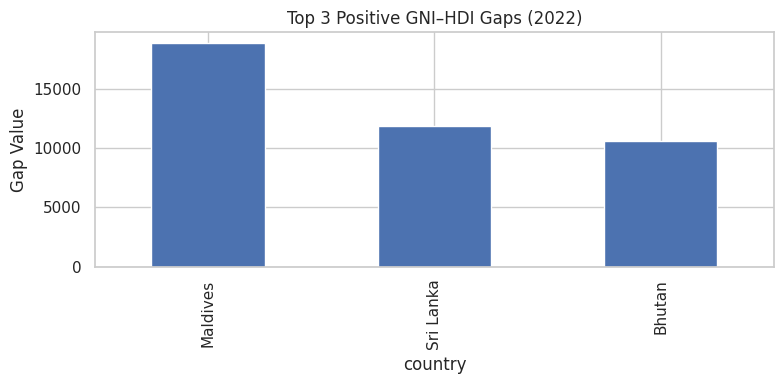

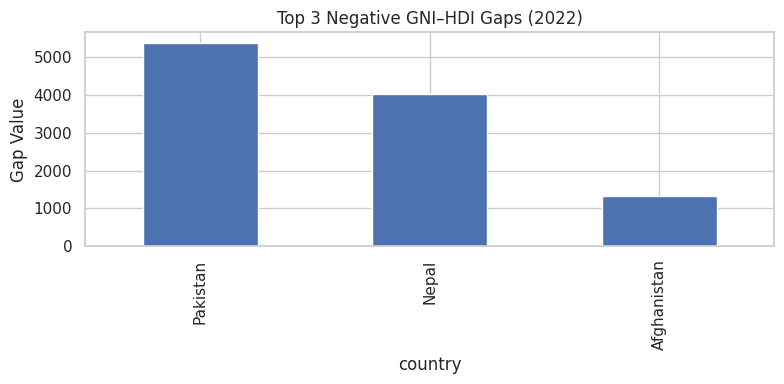

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("HDI_problem1B_cleaned.csv")

#Task 1 => Create south asia subset
#Creating subset of the asian countries
south_asia_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

#filtering the HDI dataset for only these countries
south_asia_df = df[df["country"].isin(south_asia_countries)].copy()

#saving the filtered dataset as HDI_SouthAsia.csv
south_asia_df.to_csv("HDI_SouthAsia.csv", index = False)
#files.download("HDI_SouthAsia.csv")
print("HDI_SouthAsia.csv is saved successfully!\n")

#Task 2 => composite develope score
#Checking if the required column exists in the dataset
required_cols = ["life_expectancy", "gross_inc_percap", "hdi"]
missing = [col for col in required_cols if col not in south_asia_df.columns]
if missing:
    print("These columns are missing in your dataset.", missing)

#Creating metric composite score
south_asia_df["Composite_Score"] = (
    0.30*south_asia_df["life_expectancy"] +
    0.30*south_asia_df["gross_inc_percap"]
)

# Using 2022 data for composite score ranking
south_asia_2022 = south_asia_df[south_asia_df['year']==2022].copy()
composite_rank = (south_asia_2022.groupby("country")["Composite_Score"].mean().sort_values(ascending=False))
print("\nComposite score ranking from highest to lowest (2022):\n", composite_rank)

#Ploting the five countries in horizontal bar chart
top5_composite = composite_rank.head(5)
plt.figure(figsize=(8,5))
top5_composite.plot(kind="barh")
plt.title("Top 5 South Asian Countries by Composite Score (2022)")
plt.xlabel("Composite Score")
plt.ylabel("Country")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#Comparing Composite Score with their HDI ranking
hdi_rank = (south_asia_2022.groupby("country")["hdi"].mean().sort_values(ascending=False))
comparison_df = pd.DataFrame({"HDI Rank Order": hdi_rank.index,"Composite Rank Order": composite_rank.index})
print("\nComposite Score V/S HDI ranking comparision (2022):\n", comparison_df)

#Task 3 => Outlier Detection
south_asia_df['Outlier'] = False

for year in south_asia_df['year'].unique():
    temp = south_asia_df[south_asia_df['year']==year]

    #computing IQR for HDI
    Q1_hdi = temp['hdi'].quantile(0.25)
    Q3_hdi = temp['hdi'].quantile(0.75)
    IQR_hdi = Q3_hdi - Q1_hdi

    #computing IQR for GNI
    Q1_gni = temp['gross_inc_percap'].quantile(0.25)
    Q3_gni = temp['gross_inc_percap'].quantile(0.75)
    IQR_gni = Q3_gni - Q1_gni

    #Appling 1.5* IQR rule in HDI
    hdi_low = Q1_hdi - 1.5*IQR_hdi
    hdi_high = Q3_hdi + 1.5*IQR_hdi

    #Appling 1.5* IQR rule in GNI
    gni_low = Q1_gni - 1.5*IQR_gni
    gni_high = Q3_gni + 1.5*IQR_gni

    #Detecting Outlier in HDI and GNI
    mask = ((temp['hdi'] < hdi_low) | (temp['hdi'] > hdi_high) |
            (temp['gross_inc_percap'] < gni_low) | (temp['gross_inc_percap'] > gni_high))
    south_asia_df.loc[temp.index, 'Outlier'] = mask

#Plotting Outliers for 2022
df_year = south_asia_df[south_asia_df['year']==2022]
outliers = df_year[df_year['Outlier']]
normal = df_year[~df_year['Outlier']]

plt.figure(figsize=(10,6))
plt.scatter(normal['gross_inc_percap'], normal['hdi'],
            color='blue', s=80, alpha=0.6, label='Normal Countries')
plt.scatter(outliers['gross_inc_percap'], outliers['hdi'],
            color='red', s=150, alpha=0.8, label='Outliers',
            edgecolors='black', linewidths=1.5)
plt.xlabel("GNI per Capita ($)")
plt.ylabel("HDI")
plt.title("Outlier Detection: GNI per Capita vs HDI (South Asia, 2022)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#Tak 4 => Exploring Metric Relationships
#Selecting two matric -> gender development index and life expectancy rate
metric1 = "gender_development"
metric2 = "life_expectancy"

#Computing Pearson coorelation for each matrics with hdi (all years)
corr1 = south_asia_df[metric1].corr(south_asia_df["hdi"])
corr2 = south_asia_df[metric2].corr(south_asia_df["hdi"])
print(f"\nCorrelation (HDI vs {metric1}): {corr1:.3f}")
print(f"Correlation (HDI vs {metric2}): {corr2:.3f}")

#Creating scatter plots with trendlines
sns.lmplot(data=south_asia_df, x=metric1, y="hdi")
plt.title(f"HDI vs {metric1} (All Years)")
plt.tight_layout()
plt.show()

sns.lmplot(data=south_asia_df, x=metric2, y="hdi")
plt.title(f"HDI vs {metric2} (All Years)")
plt.tight_layout()
plt.show()

#Task 5 => Gap analysis
#Creating a new matric GNI_HDI_Gap (2022 only)
south_asia_2022["GNI_HDI_Gap"] = (south_asia_2022["gross_inc_percap"] - south_asia_2022["hdi"])

#Ranking s-Asian countries by GNI_HDI_Gap (2022)
gap_rank = (south_asia_2022.groupby("country")["GNI_HDI_Gap"].mean().sort_values(ascending=False))
print("\nCountries with Largest Positive Gap (2022):", gap_rank.head(3))
print("\nCountries with Largest Negative Gap (2022):", gap_rank.tail(3))

#Plotting the top 3 positive and top 3 negative gaps
top_pos_gap = gap_rank.head(3)
top_neg_gap = gap_rank.tail(3)

plt.figure(figsize=(8,4))
top_pos_gap.plot(kind="bar")
plt.title("Top 3 Positive GNI–HDI Gaps (2022)")
plt.ylabel("Gap Value")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
top_neg_gap.plot(kind="bar")
plt.title("Top 3 Negative GNI–HDI Gaps (2022)")
plt.ylabel("Gap Value")
plt.tight_layout()
plt.show()



Problem 3

Subsets created successfully!

South Asia HDI (2020–2022) -> Mean: 0.640, Std: 0.098
Middle East HDI (2020–2022) -> Mean: 0.789, Std: 0.141
The region performing better on average HDI: Middle East

South Asia Top 3 Countries:
 country
Sri Lanka    0.780000
Maldives     0.750667
Bhutan       0.677667
Name: hdi, dtype: float64

South Asia Bottom 3 Countries:
 country
Afghanistan    0.474333
Pakistan       0.537667
Nepal          0.595000
Name: hdi, dtype: float64

Middle East Top 3 Countries:
 country
United Arab Emirates    0.932667
Israel                  0.910667
Bahrain                 0.885333
Name: hdi, dtype: float64

Middle East Bottom 3 Countries:
 country
Yemen      0.426333
Iraq       0.667000
Lebanon    0.730000
Name: hdi, dtype: float64


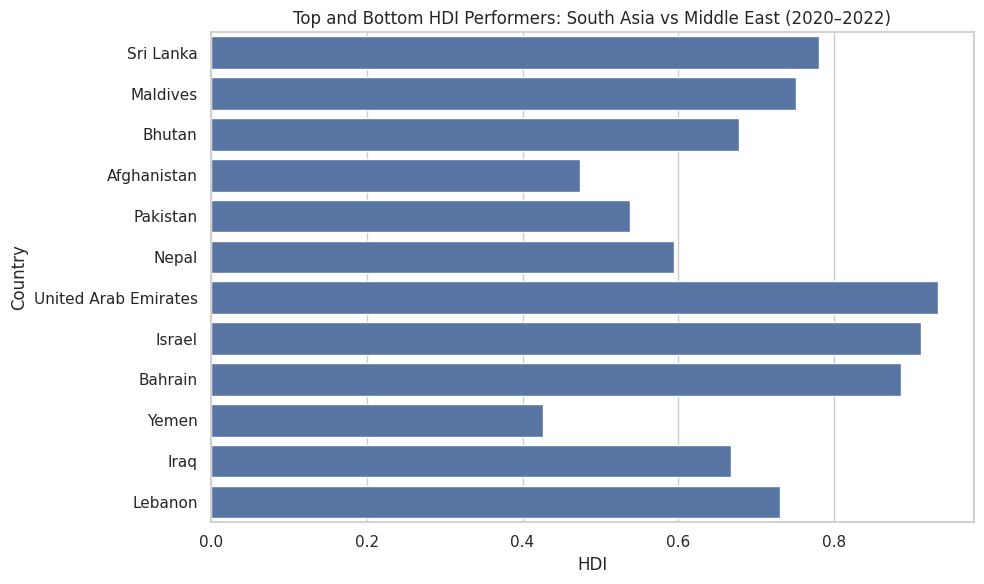

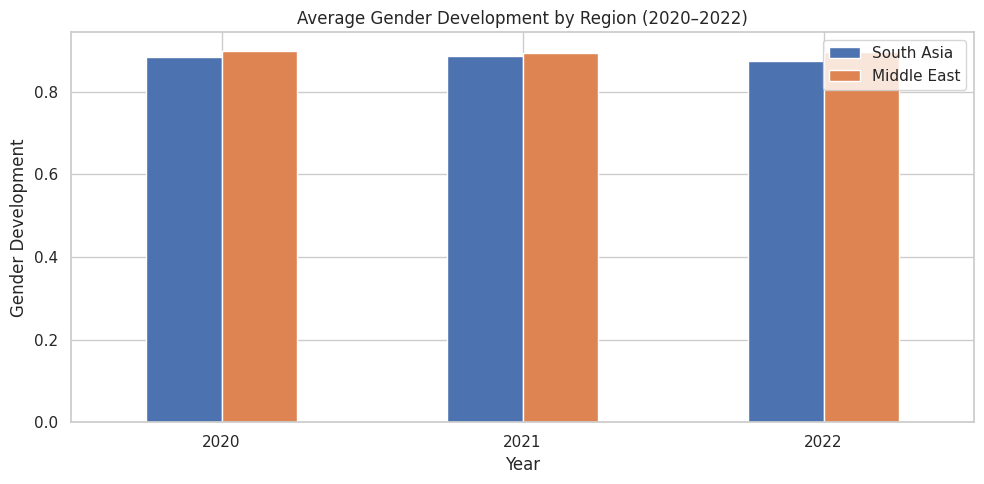

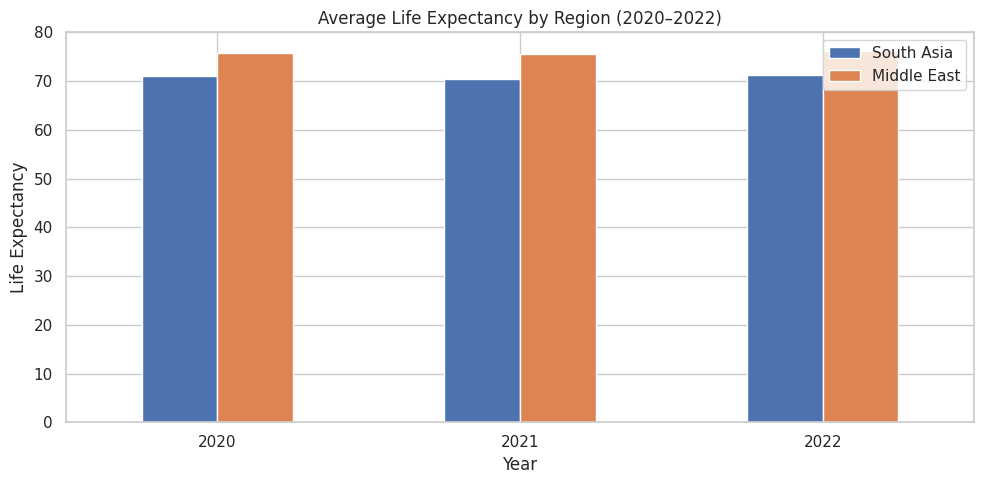

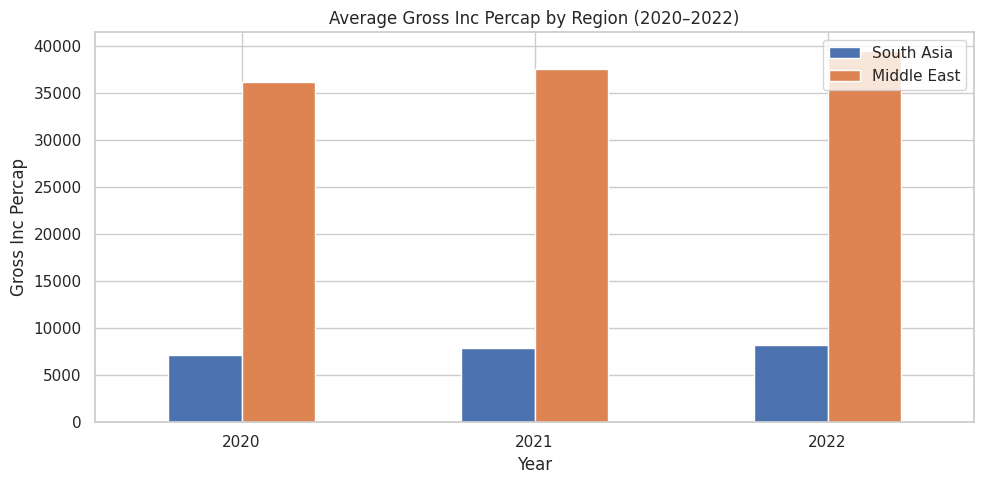

South Asia HDI Range: 0.321, CV: 0.154
Middle East HDI Range: 0.513, CV: 0.179
The region with more HDI variation: Middle East

South Asia -> Correlation (HDI vs gender_development): 0.874


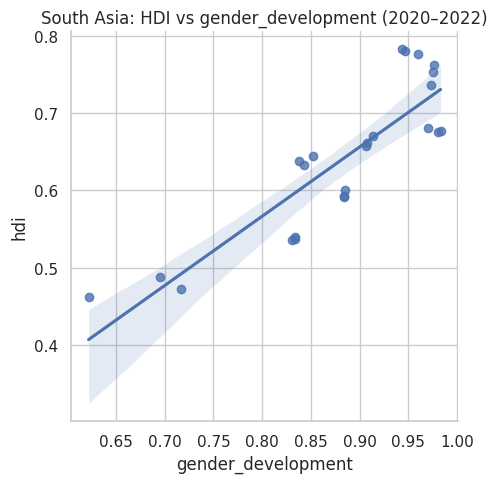

South Asia -> Correlation (HDI vs life_expectancy): 0.939


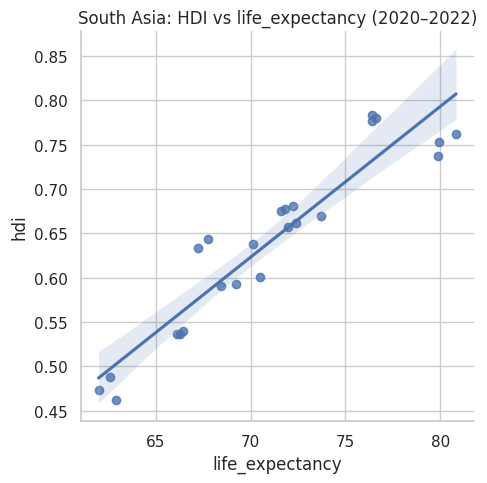

Middle East -> Correlation (HDI vs gender_development): 0.936


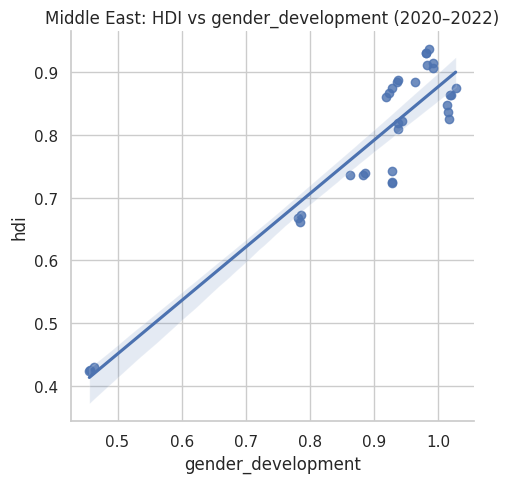

Middle East -> Correlation (HDI vs life_expectancy): 0.933


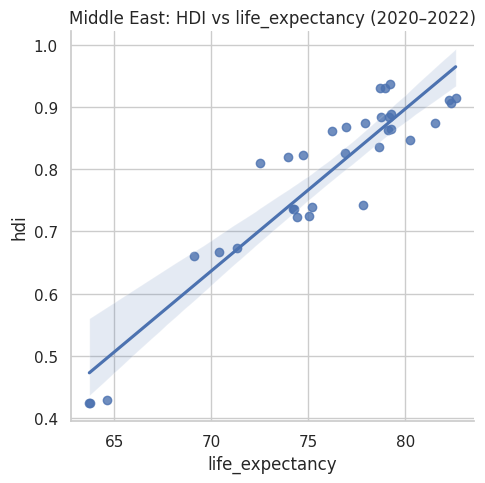

South Asia Outliers:
 Empty DataFrame
Columns: [country, year, hdi, gross_inc_percap]
Index: []


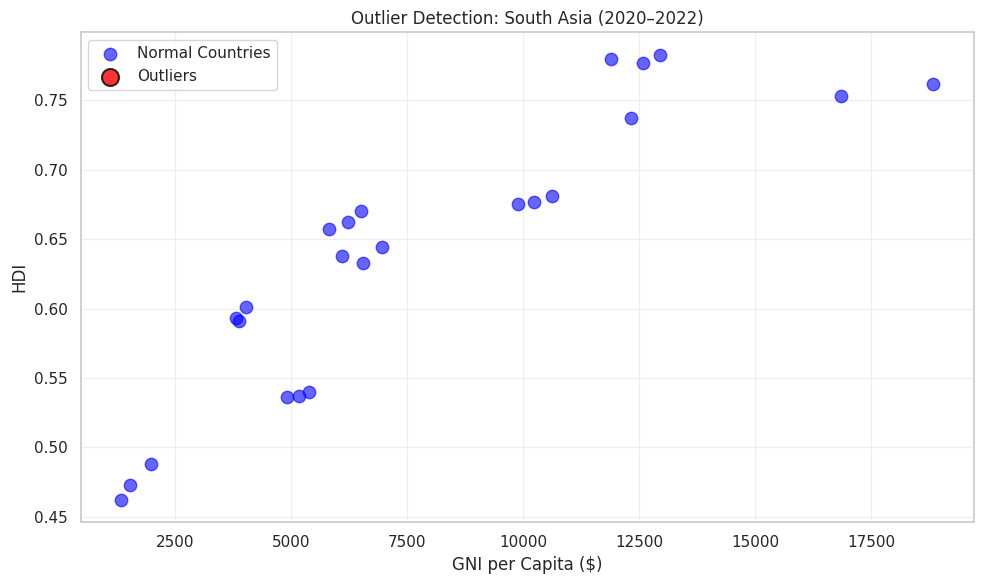

Middle East Outliers:
     country  year    hdi  gross_inc_percap
568   Yemen  2020  0.430       1152.015672
569   Yemen  2021  0.425       1112.162989
570   Yemen  2022  0.424       1105.763435


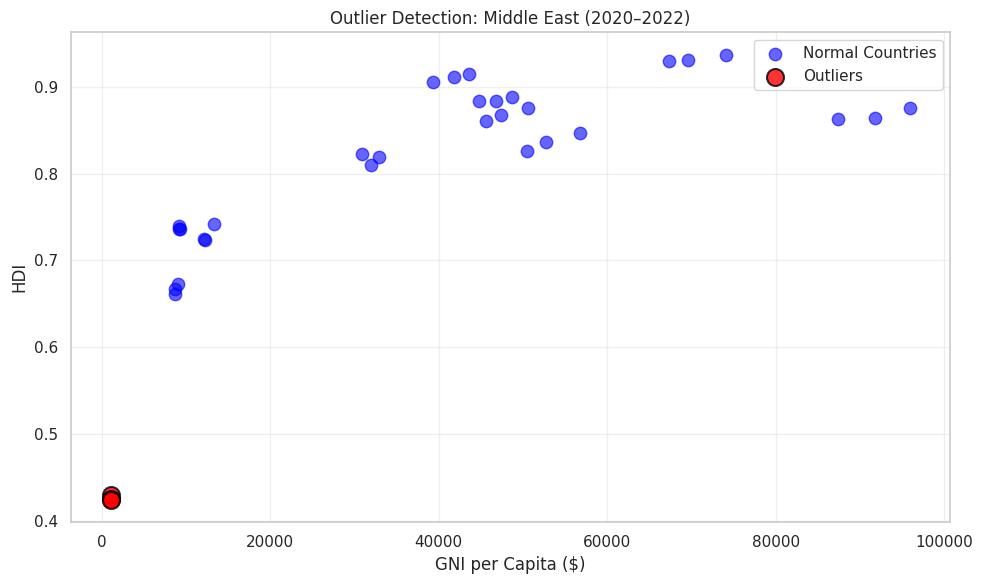

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

HDI_df = pd.read_csv("HDI_problem1B.csv")

#Task 1 =>Create Middle East Subset
#Defining contries for Middle East and south asia
south_asia_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                        "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
                         "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
                         "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]
#Filering the dataset
south_asia_df = df[df['country'].isin(south_asia_countries)].copy()
middle_east_df = df[df['country'].isin(middle_east_countries)].copy()

#Saving the subsets into csv
south_asia_df.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
middle_east_df.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)
print("Subsets created successfully!\n")

#Task2 => Descriptive Statistics
#Computing mean and std of HDI for each region
sa_hdi_mean = south_asia_df["hdi"].mean()
sa_hdi_std = south_asia_df["hdi"].std()
me_hdi_mean = middle_east_df["hdi"].mean()
me_hdi_std = middle_east_df["hdi"].std()

print(f"South Asia HDI (2020–2022) -> Mean: {sa_hdi_mean:.3f}, Std: {sa_hdi_std:.3f}")
print(f"Middle East HDI (2020–2022) -> Mean: {me_hdi_mean:.3f}, Std: {me_hdi_std:.3f}")

#Identifying which region performs better
better_region = "South Asia" if sa_hdi_mean > me_hdi_mean else "Middle East"
print(f"The region performing better on average HDI: {better_region}\n")

#Task 3 => Top and Bottom Performers
#Top3 and buttom3 countries in South Asia based on HDI
sa_top3 = south_asia_df.groupby("country")["hdi"].mean().sort_values(ascending=False).head(3)
sa_bottom3 = south_asia_df.groupby("country")["hdi"].mean().sort_values(ascending=True).head(3)
print("South Asia Top 3 Countries:\n", sa_top3)
print("\nSouth Asia Bottom 3 Countries:\n", sa_bottom3)

#Top3 and buttom3 countries in Middle East based on HDI
me_top3 = middle_east_df.groupby("country")["hdi"].mean().sort_values(ascending=False).head(3)
me_bottom3 = middle_east_df.groupby("country")["hdi"].mean().sort_values(ascending=True).head(3)
print("\nMiddle East Top 3 Countries:\n", me_top3)
print("\nMiddle East Bottom 3 Countries:\n", me_bottom3)

#Bar chart for top and bottom performers
top_bottom_df = pd.concat([sa_top3, sa_bottom3, me_top3, me_bottom3]).reset_index()
top_bottom_df.columns = ["Country", "HDI"]

plt.figure(figsize=(10,6))
sns.barplot(data=top_bottom_df, x="HDI", y="Country")
plt.title("Top and Bottom HDI Performers: South Asia vs Middle East (2020–2022)")
plt.xlabel("HDI")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

#Task 4 => Metric Comparisons
#Comparing matrics across regions
metrics = ["gender_development", "life_expectancy", "gross_inc_percap"]

for metric in metrics:
    region_avg = pd.DataFrame({
        "South Asia": south_asia_df.groupby("year")[metric].mean(),
        "Middle East": middle_east_df.groupby("year")[metric].mean()
    })
    region_avg.plot(kind="bar", figsize=(10,5))
    plt.title(f"Average {metric.replace('_',' ').title()} by Region (2020–2022)")
    plt.ylabel(metric.replace('_',' ').title())
    plt.xlabel("Year")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

#Task 5 => HDI Disparity
#Computing min-max of HDI both region
sa_hdi_range = south_asia_df["hdi"].max() - south_asia_df["hdi"].min()
me_hdi_range = middle_east_df["hdi"].max() - middle_east_df["hdi"].min()

sa_hdi_cv = south_asia_df["hdi"].std() / south_asia_df["hdi"].mean()
me_hdi_cv = middle_east_df["hdi"].std() / middle_east_df["hdi"].mean()

print(f"South Asia HDI Range: {sa_hdi_range:.3f}, CV: {sa_hdi_cv:.3f}")
print(f"Middle East HDI Range: {me_hdi_range:.3f}, CV: {me_hdi_cv:.3f}")

#Identifying which region exhibits more variation
more_variation_region = "South Asia" if sa_hdi_cv > me_hdi_cv else "Middle East"
print(f"The region with more HDI variation: {more_variation_region}\n")

#Task 6 => Correlation Analysis
#Computing correlations of HDI
for region_name, region_df in zip(["South Asia", "Middle East"], [south_asia_df, middle_east_df]):
    for metric in ["gender_development", "life_expectancy"]:
        corr = region_df[metric].corr(region_df["hdi"])
        print(f"{region_name} -> Correlation (HDI vs {metric}): {corr:.3f}")

        #Creating Scatter plot with trendline
        sns.lmplot(data=region_df, x=metric, y="hdi")
        plt.title(f"{region_name}: HDI vs {metric} (2020–2022)")
        plt.tight_layout()
        plt.show()

#Task 7 => Outlier Detection
#Detect outliers using 1.5*IQR rule
def detect_outliers(df, value_cols):
    outlier_mask = pd.Series(False, index=df.index)
    for col in value_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        low = Q1 - 1.5*IQR
        high = Q3 + 1.5*IQR
        outlier_mask |= (df[col] < low) | (df[col] > high)
    return outlier_mask

for region_name, region_df in zip(["South Asia", "Middle East"], [south_asia_df, middle_east_df]):
    region_df["Outlier"] = detect_outliers(region_df, ["hdi", "gross_inc_percap"])
    outliers = region_df[region_df["Outlier"]]
    normal = region_df[~region_df["Outlier"]]

    print(f"{region_name} Outliers:\n", outliers[['country','year','hdi','gross_inc_percap']])

    #Creating scatter plot
    plt.figure(figsize=(10,6))
    plt.scatter(normal['gross_inc_percap'], normal['hdi'], color='blue', s=80, alpha=0.6, label='Normal Countries')
    plt.scatter(outliers['gross_inc_percap'], outliers['hdi'], color='red', s=150, alpha=0.8, label='Outliers',
                edgecolors='black', linewidths=1.5)
    plt.xlabel("GNI per Capita ($)")
    plt.ylabel("HDI")
    plt.title(f"Outlier Detection: {region_name} (2020–2022)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
